In [2]:
"""
Autor: Vitor Fred Souza Oliveira 
Data: 09/03/2021

"""
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline
import sqlite3

# Ativos da Carteira

In [3]:
conn = sqlite3.connect('ativos.db')
cursor = conn.cursor()
#Cria o array de ativos e dos ativos com quantidade
query =" SELECT sigla, qtd FROM ativos WHERE moeda = 'ACAO';"
cursor.execute(query)
ativos_qtd = {}
ativos = []
pesos = []
for linha in cursor:
    ativos_qtd[linha[0]] = linha[1] 
    ativos.append(linha[0]) 
conn.close()


In [4]:
start = datetime(2018,1,1)
ativos

['ABEV3.SA',
 'ENBR3.SA',
 'ITUB3.SA',
 'ITUB4.SA',
 'BBDC4.SA',
 'ITSA4.SA',
 'TAEE11.SA']

In [5]:
#ativos/ações 
tickers= ativos

#busca os ativos de acordo com a data inicial 
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]= data.DataReader(t, data_source='yahoo', start=start)['Adj Close']


In [6]:
#Calcula o valor total das acoes na carteira - (cotação do ativo * qtd)
total = 0.0
for key, value in ativos_qtd.items():
    #total += (acoes[key].tail(2)[0].sum() * value)
    total += (acoes[key].tail(1).sum() * value)
    #tambem pode pegar a media do periodo
    #total += (acoes[key].sum() * value)

#cria o array de  peso do ativos contidos na carteira    
# cotação do ativo * quantidade em carteira / total da carteira
pesos = []
for key, value in ativos_qtd.items():
     #"%.4f" % (acoes[key].tail(1).sum() *  value / total)
    pesos.append(round(acoes[key].tail(1).sum() *  value / total,4))


# Retorno Simples = PF - PI / PI

In [7]:
#retorno diario dos aivos ( ideal para calculo de várias ações)
returns = acoes / acoes.shift(1) - 1
#returns.head()

In [8]:
#Returno diário da Ambev
#returns["ABEV3.SA"].plot(figsize=(8,5))
#returns["ABEV3.SA"].plot()

In [9]:
#media do retorno diário das acoes 
avg_returns_d = returns.mean()
#avg_returns_d

In [10]:
#Retorno médio anual
avg_returns_a = returns.mean() * 250
#print(str(round(avg_returns_a["ABEV3.SA"] ,5) * 100) + "%")  
print(str(round(avg_returns_a ,5) * 100))  

ABEV3.SA     -2.743
ENBR3.SA     20.124
ITUB3.SA      8.727
ITUB4.SA      8.877
BBDC4.SA     13.921
ITSA4.SA     12.898
TAEE11.SA    26.180
dtype: float64


# Retorno Logaritmo = log(PF/PI) ou log(PF) - log(PI)

In [11]:
#retorno logaritmo ( ideal para calculo de uma unica ação)
log_returns = np.log(acoes / acoes.shift(1)) 
#log_returns.head()

In [12]:
#media do retorno logaritmo diário das acoes 
avg_log_returns_d = log_returns.mean()
#avg_log_returns_d

In [13]:
#Retorno médio anual
avg_log_returns_a = log_returns.mean() * 250
print(str(round(avg_log_returns_a ,5) * 100))  

ABEV3.SA     -8.378
ENBR3.SA     14.618
ITUB3.SA      3.673
ITUB4.SA      2.425
BBDC4.SA      5.642
ITSA4.SA      6.854
TAEE11.SA    23.762
dtype: float64


# Taxa de Retorno do Portfólio
##  retorno = taxa de reotorno de um ativo * peso no portofolio

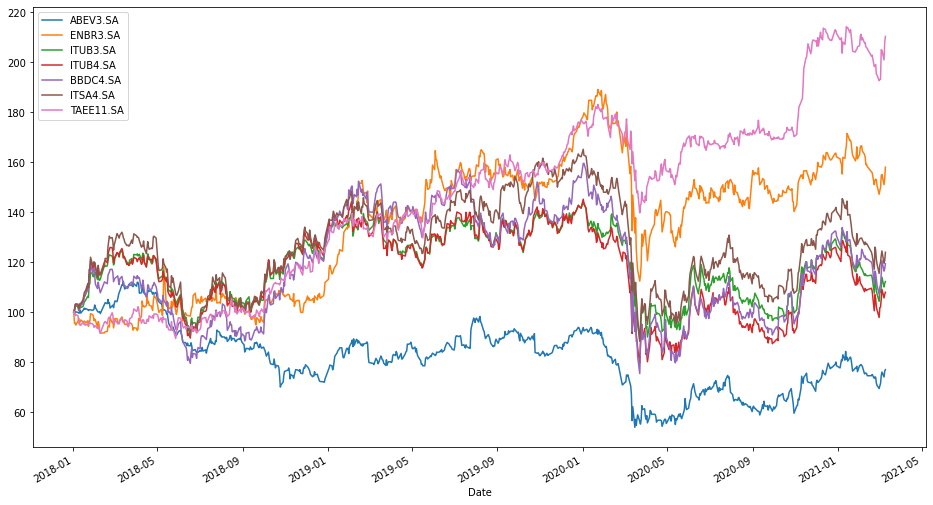

In [14]:
#normaliza atual / primeira * 100 neste caso toda a primeira será 100 tendo assim um ponto de referência
#evolução das ações(dados do yahoo finance)
(acoes / acoes.iloc[0] * 100).plot(figsize = (16,9));
plt.legend()
plt.show()

In [19]:
# neste caso estou colocando valores randomicamente e gerar os  meus pesos aleatorios
#para testar qual os  pesos retornarao as melhores taxas 

#weights = np.random.random(len(ativos))
#weights /= np.sum(weights)
#weights

#neste caso usando o peso da carteira atual
weights = pesos
weights /= np.sum(weights)
for i in range(len(weights)):
    print("{:.2f}".format(weights[i] *100))

11.23
16.41
17.96
9.13
5.79
31.70
7.77


In [16]:
portofolio_1 = str(round(np.dot(avg_returns_a, weights),5) *100) + ' %'
print(portofolio_1) 


12.302 %


In [20]:
total

2992.0500316619873